In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score

### Regression on close of same day

> Regrssion without any Scaling of regressors, but here we are training the model on the data of the same day to predict the close of the same day.

> Here the future set is the last 30days of bit_df and the prediction will give the prediction for the 'close' of same 30 days

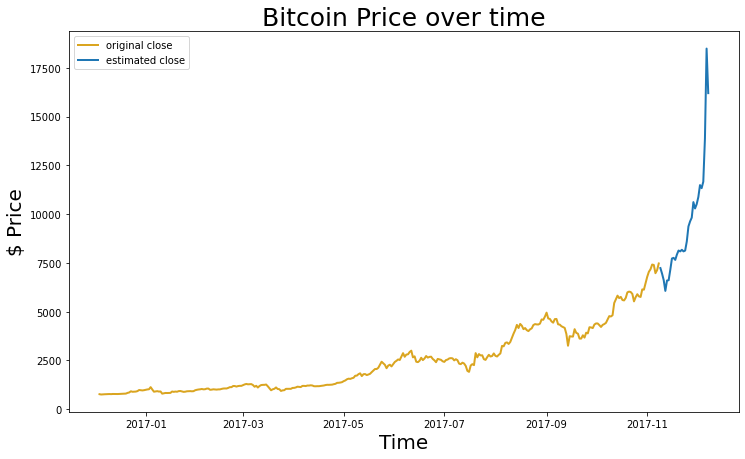

In [2]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df
x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'

x = bit_df[x_col]
Y = bit_df[y_col]

X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.shift(periods=30).tail(30)
fut_x = future_set[x_col]

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-400:-60], bit_df["close"][-400:-60], color='goldenrod', lw=2,label = 'original close')
# plt.plot(bit_df.index, bit_df["wp"], color='red', lw=2)
plt.plot( bit_df.date[-60:-30],prediction, lw=2,label = 'estimated close')
plt.legend()#future_set.index
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

### Regression on Close of 30 days future

#### Algo:

> the 'close_tm' variable in bit_df will have the values of close form 30days in the future.

> We are regressing the 'close_tm' with current data.

### Without any Scaling of regressors

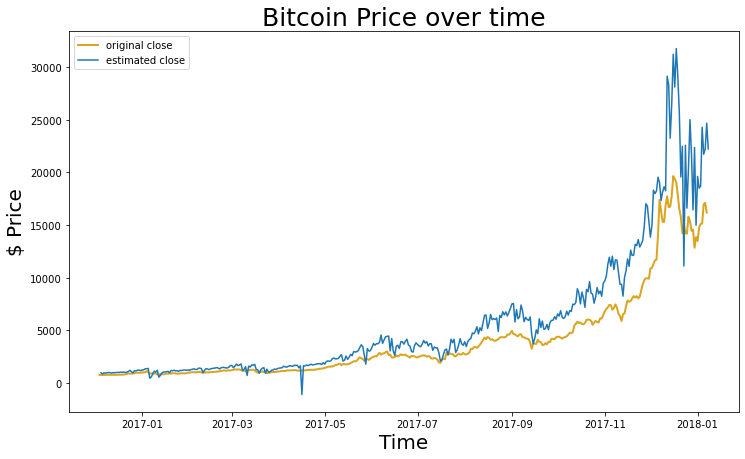

In [3]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -30)
y_col = 'close_tm'
x = bit_df[x_col][:-30]
Y = bit_df[y_col][:-30]

X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(400)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-400:], bit_df["close"][-400:], color='goldenrod', lw=2,label = 'original close')
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-400],periods=401)[1:],prediction,label = 'estimated close')
plt.legend()
plt.title("Bitcoin Price over time", size=25) 
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

### Using MinMaxScaler for scaling the Regressors

In [4]:
from sklearn.preprocessing import MinMaxScaler

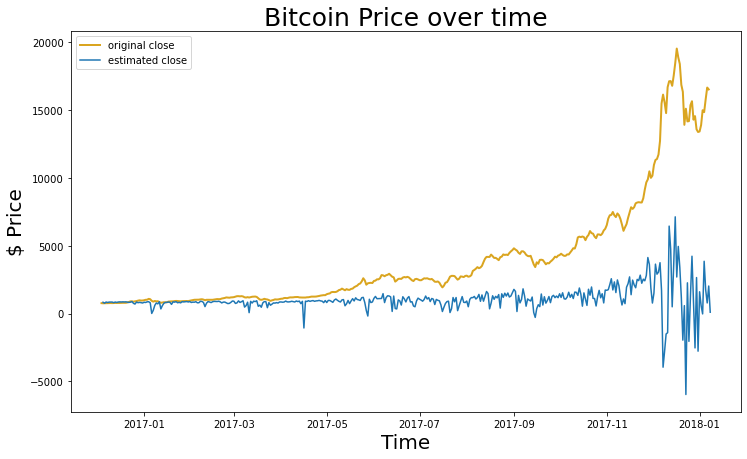

In [5]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -30)
y_col = 'close_tm'
x = bit_df[x_col][:-30]
Y = bit_df[y_col][:-30]
# scaler = StandardScaler().fit(x)
# X  = scaler.transform(x)
scaler = MinMaxScaler().fit(x)
X  = scaler.transform(x)
# X=x
# X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(400)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]
# scaler = StandardScaler().fit(fut_x)
# fut_x  = scaler.transform(fut_x)
scaler = MinMaxScaler().fit(fut_x)
fut_x  = scaler.transform(fut_x)

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-400:], bit_df["wp"][-400:], color='goldenrod', lw=2,label = 'original close')
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-400],periods=401)[1:],prediction,label = 'estimated close')
plt.legend()
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

> From the graph above its evident that the MinMaxScaling makes the Regression worse by scaling the values to (0,1)

 ###  Using the StandardScaler for scaling the Regressors

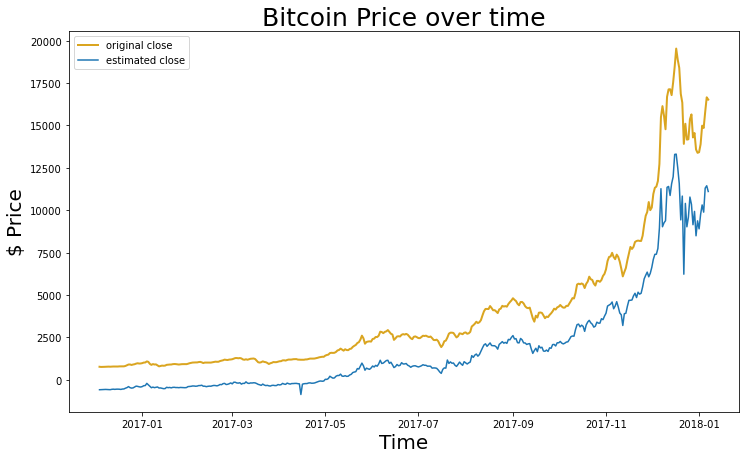

In [6]:
bit_df = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2018-01-08.csv')
bit_df

# %%time
# Convert unix time to datetime
bit_df['date'] = pd.to_datetime(bit_df.Timestamp, unit='s')
# Reset index
bit_df = bit_df.set_index('date')
# Rename columns so easier to code
bit_df = bit_df.rename(columns={'Open':'open', 'High': 'hi', 'Low': 'lo', 
                       'Close': 'close', 'Volume_(BTC)': 'vol_btc',
                       'Volume_(Currency)': 'vol_cur', 
                       'Weighted_Price': 'wp', 'Timestamp': 'ts'})
# Resample and only use recent samples that aren't missing
bit_df = bit_df.resample('d').agg({'open': 'first', 'hi': 'max', 
    'lo': 'min', 'close': 'last', 'vol_btc': 'sum',
    'vol_cur': 'sum', 'wp': 'mean', 'ts': 'min'}).iloc[-1000:]
# drop last row as it is not complete
bit_df = bit_df.iloc[:-1]
bit_df ['date'] = bit_df.index
bit_df.reset_index(inplace=True,drop=True)
bit_df

x_col = ['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp']
y_col = 'close'
bit_df['close_tm'] = bit_df[y_col].shift(periods = -10)
y_col = 'close_tm'
x = bit_df[x_col][:-10]
Y = bit_df[y_col][:-10]
scaler = StandardScaler().fit(x)
X  = scaler.transform(x)
# scaler = MinMaxScaler().fit(x)
# X  = scaler.transform(x)
# X=x
# X=x

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state = 5)

m1 = LinearRegression()
m1.fit(x_train,y_train)


future_set = bit_df.tail(400)#bit_df[['hi',	'open','lo',	'vol_btc',	'vol_cur',	'wp','close']].shift(periods=30).
fut_x = future_set[x_col]
scaler = StandardScaler().fit(fut_x)
fut_x  = scaler.transform(fut_x)
# scaler = MinMaxScaler().fit(fut_x)
# fut_x  = scaler.transform(fut_x)

prediction = m1.predict(fut_x)


plt.figure(figsize = (12, 7))
plt.plot(bit_df.date[-400:], bit_df["wp"][-400:], color='goldenrod', lw=2,label = 'original close')
# plt.plot(bit_df.date, bit_df["wp"], color='red', lw=2)
plt.plot(pd.date_range(start = bit_df.date.iloc[-400],periods=400)[:],prediction,label = 'estimated close')
plt.legend()
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

plt.show()

> This makes the regression more worse by scaling the X values in a Gaussian Distribution.

> Since the training set has more values, it has a different scaled values compared to the test values/ future set whuch has less number of values that can be scaled
